In [1]:
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.7.0


In [ ]:
# Checking if cuda is there.
print("Cuda Availability: ", tf.test.is_built_with_cuda())

# Checking GPU is available or not.
print("GPU  Availability: ", tf.test.is_gpu_available())

# Check nos of GPUS
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [3]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


# Data Downloading

In [4]:
# for testing and testing
##########################
# Note: choose the dataset version and path

# Enable for Greyscale views
#dataset_version= 'original_modelnet40v1'  
#dataset_test = './data/original_modelnet40v1_test' 
  

# Enable for Shaded views
dataset_version= 'shaded_modelnet40v1'    
dataset_test = './data/shaded_modelnet40v1_test' 


# Enable for Depth views
# dataset_version= 'depth_modelnet40v1' 
# dataset_test = './data/depth_modelnet40v1_test'   # Enable for Depth views



# Data Processing


We've included helper functions that will label images, convert them into arrays, and then finally into a generator that will enable them to be loaded into the model in batches

In [5]:
# for testing and testing
##########################

import random #Python Random module is an in-built module of Python which is used to generate random numbers.
from random import shuffle #is an inbuilt method of the random module. It is used to shuffle a sequence (list). Shuffling a list of objects means changing the position of the elements of the sequence
import cv2 # OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
import os # Python OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system.
from tqdm import tqdm # is a library in Python which is used for creating Progress Meters or Progress Bars. tqdm got its name from the Arabic name taqaddum which means 'progress'
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. Make interactive figures that can zoom, pan, update. Customize visual style and layout.
import numpy as np #NumPy (Numerical Python) is an open-source library for the Python programming language. It is used for scientific computing and working with arrays.
from tensorflow.python.keras.utils.data_utils import Sequence #Keras and TensorFlow are open source Python libraries for working with neural networks, creating machine learning models and performing deep learning
# keras.utils This package provides utilities for Keras, such as modified callbacks, genereators, etc.
import tensorflow as tf


In [6]:
# for testing and testing
##########################

#For shuffling or any thing random
import random #Python Random module is an in-built module of Python which is used to generate random numbers.
from random import shuffle #is an inbuilt method of the random module. It is used to shuffle a sequence (list). Shuffling a list of objects means changing the position of the elements of the sequence
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# for testing and testing
##########################

global num_views

if dataset_version == 'modelnet40v1' or dataset_version == 'original_modelnet40v1':
    num_views = 12
elif dataset_version == 'modelnet40v2':
    num_views = 20
elif dataset_version == 'shaded_modelnet40v1' or dataset_version == 'depth_modelnet40v1':
    num_views = 12

print ("number of views is " + str(num_views))

number of views is 12


In [ ]:
# spicify the img size (here 224*224)
Img_Size= 224

In [15]:
# for training and testing
##########################


def extract_View_No(img): # function to extract the view no
  ## Helper for process_data
  ViewNo =img[-6:-4] #take the last 2 characters from the img name before the ".png"
  if ViewNo == '01': return 1
  elif ViewNo == '02': return 2
  elif ViewNo == '03': return 3
  elif ViewNo == '04': return 4
  elif ViewNo == '05': return 5
  elif ViewNo == '06': return 6
  elif ViewNo == '07': return 7
  elif ViewNo == '08': return 8
  elif ViewNo == '09': return 9
  elif ViewNo == '10': return 10
  elif ViewNo == '11': return 11
  elif ViewNo == '12': return 12
  elif ViewNo == '13': return 13
  elif ViewNo == '14': return 14
  elif ViewNo == '15': return 15
  elif ViewNo == '16': return 16
  elif ViewNo == '17': return 17
  elif ViewNo == '18': return 18
  elif ViewNo == '19': return 19
  elif ViewNo == '20': return 20
  #print(ViewNo)


def label_image_encoder(img): # function to label image
  ## Helper for process_data
  label = img.split('_')[0] # from the image name, take the part before "_" and consider it as label #split() method is a beneficial tool for manipulating strings. It returns a list of strings after the main string is separated by a delimiter.
  if label == 'airplane': return 0 # encode airplane label as 0
  elif label == 'bathtub': return 1 # encode bathtub label as 1
  elif label == 'bed': return 2 # encode bed label as 2
  elif label == 'bench': return 3 # encode bench label as 3
  elif label == 'bookshelf': return 4 # encode bookshelf label as 4
  elif label == 'bottle': return 5 # encode bottle label as 5
  elif label == 'bowl': return 6 # encode bowl label as 6
  elif label == 'car': return 7 # encode car label as 7
  elif label == 'chair': return 8 # encode chair label as 8
  elif label == 'cone': return 9 # encode cone label as 9
  elif label == 'cup': return 10 # encode cup label as 10
  elif label == 'curtain': return 11 # encode curtain label as 11
  elif label == 'desk': return 12 # encode desk label as 12
  elif label == 'door': return 13 # encode door label as 13
  elif label == 'dresser': return 14 # encode dresser label as 14
  elif label == 'flower': return 15 # encode floer_pot label as 15
  elif label == 'glass': return 16 # encode glass_box label as 16
  elif label == 'guitar': return 17 # encode guitar label as 17
  elif label == 'keyboard': return 18 # encode keyboard label as 18
  elif label == 'lamp': return 19 # encode lamp label as 19
  elif label == 'laptop': return 20 # encode laptop label as 20
  elif label == 'mantel': return 21 # encode mantel label as 21
  elif label == 'monitor': return 22 # encode monitor label as 22
  elif label == 'night': return 23 # encode night_stand label as 23
  elif label == 'person': return 24 # encode person label as 24
  elif label == 'piano': return 25 # encode piano label as 25
  elif label == 'plant': return 26 # encode plant label as 26
  elif label == 'radio': return 27 # encode radio label as 27
  elif label == 'range': return 28 # encode range_hood label as 28
  elif label == 'sink': return 29 # encode sink label as 29
  elif label == 'sofa': return 30 # encode sofa label as 30
  elif label == 'stairs': return 31 # encode stairs label as 31
  elif label == 'stool': return 32 # encode stool label as 32
  elif label == 'table': return 33 # encode table label as 33
  elif label == 'tent': return 34 # encode tent label as 34
  elif label == 'toilet': return 35 # encode toilet label as 35
  elif label == 'tv': return 36 # encode tv_stand label as 36
  elif label == 'vase': return 37 # encode vase label as 37
  elif label == 'wardrobe': return 38 # encode wardrobe label as 38
  elif label == 'xbox': return 39 # encode xbox label as 39



## here I add the ViewNo
def process_data(image_list, DATA_FOLDER, IMG_SIZE): # function that take the images, the data folder name, and the wanted image size, and retun the list of images as arrays with there labels and paths
  ## Helper for manual_pre_process
  ## Creates an array of images, labels, and file path
  ## Shuffles the array before returning
  data_df = [] #[] is a list: A multible collection of values, here define new array
  for img in tqdm(image_list): # tqdm . It will display a progress bar of the for loop, for each image in image_list do the following
    path = os.path.join(DATA_FOLDER, img) # concatenates various path components with exactly one directory separator ('/'), concatenate DATA_FOLDER path then / then the image name to create an image's path
    ViewNo = extract_View_No(img) # extract the view no
    label = label_image_encoder(img) # use the above function to encode the image's label
    img = cv2.imread(path, cv2.IMREAD_COLOR) # cv2. imread() method loads an image from the specified file. IMREAD_COLOR reads the image with RGB colors but no transparency channel, load image from its path
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) # Resizing the image img, by only change the width=IMG_SIZE and height=IMG_SIZE of the image, this step to make all image with the same size
    #data_df.append([np.array(img), np.array(label), path]) #Append in Python is a pre-defined method used to add a single item to certain collection types. so, append the list data_df by adding sum-list with 3 element for each image [np.array(img)=image as array, np.array(label)=image's label as 0 or 1, path=image's path]it
    data_df.append([np.array(img), np.array(label), ViewNo, path]) #Append in Python is a pre-defined method used to add a single item to certain collection types. so, append the list data_df by adding sum-list with 3 element for each image [np.array(img)=image as array, np.array(label)=image's label as 0 or 1, path=image's path]it
  #shuffle(data_df) #shuffle the list data_df by changing the position of the elements (images))
  return data_df # return the data_df list after process it


def manual_pre_process(dir, IMG_SIZE):
  '''
  Creates an array of images, labels, and files from a directory of image files

  Args:
    dir: string, folder name
    IMG_SIZE: int, image height and width

  Returns
    X: (n x IMG_SIZE x IMG_SIZE) numpy array of images
    y: (n,) numpy array of labels
    files: (n,) numpy array of files

  '''
  image_lst = sorted(os.listdir(dir)) # get the list of all files and directories in the specified directory "dir"
  data_df = process_data(image_lst, dir, IMG_SIZE) # take the images, the data folder name, and the wanted image size, and retun the list of images after processing as arrays with there labels and paths
  X = np.array([i[0] for i in data_df]).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # take the images only (as arrays) from data_df and save them as X (the input images)
  y = np.array([i[1] for i in data_df]) # take the labels only from data_df and save them as Y (the actual labels)
  ViewNos = np.array([i[2] for i in data_df]) # take the ViewNo only from data_df and save them as ViewNo
  files = np.array([i[3] for i in data_df]) # take the images' paths only from data_df and save them as files
  return X, y, ViewNos, files # return X=the images(as arrays), y=the actual labels, and files=the images' paths
  #return X, y, ViewNo, files


In [16]:
# for training and testing
##########################
# Note: name the directory
#       spicify the part of the dataset to do the manual_pre_process
#       spicify the img size (here 224)
##########################

# Dictionary
class_info = {0: 'airplane',
              1: 'bathtub',
              2: 'bed',
              3: 'bench',
              4: 'bookshelf',
              5: 'bottle',
              6: 'bowl',
              7: 'car',
              8: 'chair',
              9: 'cone',
              10: 'cup',
              11: 'curtain',
              12: 'desk',
              13: 'door',
              14: 'dresser',
              15: 'flower_pot',
              16: 'glass_box',
              17: 'guitar',
              18: 'keyboard',
              19: 'lamp',
              20: 'laptop',
              21: 'mantel',
              22: 'monitor',
              23: 'night_stand',
              24: 'person',
              25: 'piano',
              26: 'plant',
              27: 'radio',
              28: 'range_hood',
              29: 'sink',
              30: 'sofa',
              31: 'stairs',
              32: 'stool',
              33: 'table',
              34: 'tent',
              35: 'toilet',
              36: 'tv_stand',
              37: 'vase',
              38: 'wardrobe',
              39: 'xbox'} # define a dictionary (a key/value mapping) of the labels


X_test, y_test, ViewNo_test, files_test = manual_pre_process(dataset_test, Img_Size)


100%|██████████| 118116/118116 [02:52<00:00, 682.92it/s] 


In [17]:
# Save all preprocessed images to a single NumPy array file
output_file = "./data/all_testing_images.npy"
np.save(output_file, X_test)

# Save all labels to a single NumPy array file
output_file = "./data/all_testing_labels.npy"
np.save(output_file, y_test)

In [9]:
# Save all images to a single NumPy array file
output_file = "./data/all_testing_images.npy"
X_test= np.load(output_file)

# Save all labels to a single NumPy array file
output_file = "./data/all_testing_labels.npy"
y_test= np.load(output_file)

In [ ]:
#for testing
########################

test_NoOfSamples= len(X_test)

print("Number of testing Samples is")
print(test_NoOfSamples)

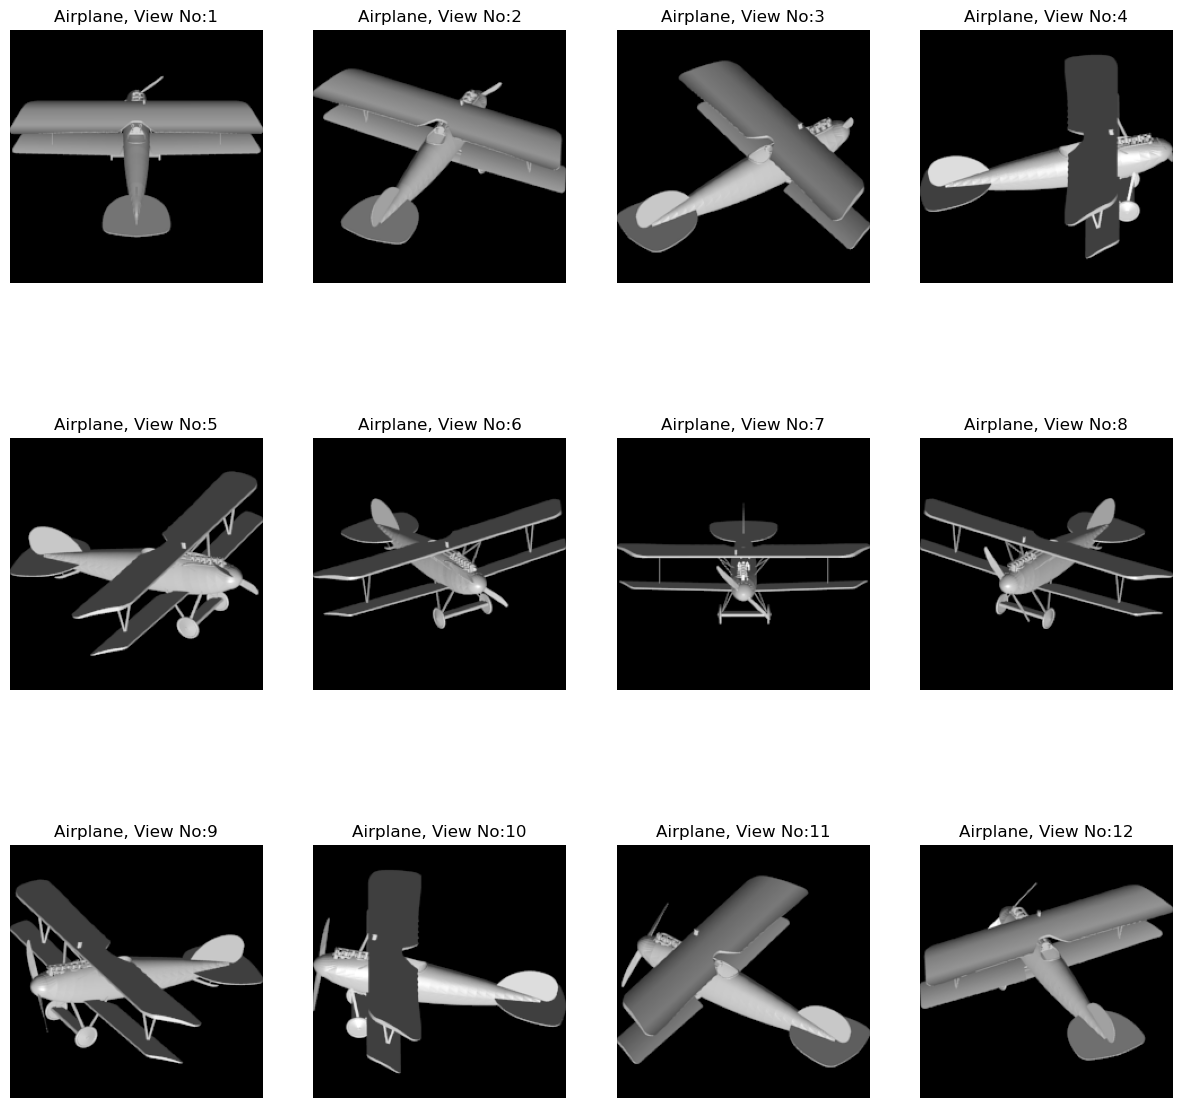

In [ ]:
# for testing
##########################
# Note: spicify the fig size based on the number of views
#       spicify the part of the dataset to do the plooting
##########################


# show the (12 or 20 views) of one object samples before feature extraction
# num_views is the number of views
plt.figure(figsize=(15, 15)) # create a fig of size 15*15
#for i in range(1,20): # for num_views=20 views
for i in range(0,num_views):
 img = X_test[i] #take sample image
 label = y_test[i] #take the label of the sample image
 viewNo= ViewNo_test[i]
 path = files_test[i] #take the path of the sample image

 #ax = plt.subplot(4, 5, i +1) # for 20 views
 ax = plt.subplot(3, 4, i +1) # 3 rows, 4 columns
 plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the img in the plot
 plt.axis('off') # remove the axis
 category = class_info[label.item()] # convert the label from ndarray to int then bring its class
 title= category.capitalize() + ', View No:' + str(viewNo)
 plt.title(title) # show the title above the img

# Load the Bakbone Network (Feature Extraction)

In [18]:
# for training and testing
##########################
# Note: spicify the part of the dataset to do to_categorical
##########################
#from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
#categorical_y_test = to_categorical(y_test, 40)
categorical_y_test = to_categorical(y_test, 40)

In [9]:
# for training and testing
##########################

# Loading the Pre-Trained Model
# Upload the required libraries

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import time
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import NASNetMobile
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import ResNet152V2

# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.applications.efficientnet import EfficientNetB1, preprocess_input
from keras.applications.efficientnet import EfficientNetB2, preprocess_input
from keras.applications.efficientnet import EfficientNetB3, preprocess_input
from keras.applications.efficientnet import EfficientNetB4, preprocess_input
from keras.applications.efficientnet import EfficientNetB5, preprocess_input
from keras.applications.efficientnet import EfficientNetB6, preprocess_input
from keras.applications.efficientnet import EfficientNetB7, preprocess_input

from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from pycm import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold

from tqdm import tqdm
from keras_tqdm import TQDMNotebookCallback
from keras_tqdm import TQDMCallback
#from keras_preprocessing.image import load_img
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import gradient_descent_v2
from keras.optimizers import adam_v2
from keras.layers import MaxPooling2D

import keras
from tensorflow import keras
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.layers import Flatten
from tensorflow.keras.layers import ( # from tensorflow.keras.layers 
     BatchNormalization, Flatten, Dropout, Dense #,BatchNormalization, SeparableConv2D, Activation, 
)
from tensorflow.keras.utils import plot_model ## from tensorflow.keras.utils 
from PIL import Image

In [10]:
# for training and testing
##########################


def plot_acc_loss(history, PLOT_NAME,model_name_txt):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig("./Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(PLOT_NAME))
    plt.show()

def getPrediction(preds): # preds is the otput scors from softmax
  im_class= np.argmax(preds, axis = 0) # the index as an array of one element , argmax Returns the indices of the maximum values along an axis
  #"the index of the class"
  idx= im_class
  #"the probability is"
  propability= preds[idx]
  # the class label
  label= class_info[idx]
  return idx, label, propability

In [11]:
# for training and testing
##########################
# Note: spicify the BATCH_SIZE based on the number of views
#       spicify the img size that expected by the deep model
##########################


CLASSES = 40
WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 384 #192 #20 shapes with a total of 400 views (20*20 =400) for 20-views version,  and 32 shapes with a total of 384 views (32*12 =384)) for 12-views version
Mini_BATCH_SIZE= 32
EPOCHS = 30 # 20
learning_rate = 0.0001

In [12]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [13]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator1(Sequence):
    def __init__(self, x_set, batch_size):
        self.x = x_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
#import torchvision.models.swin_transformer as swin_transformer
import torchvision.datasets as datasets
from torchsummary import summary
from transformers import AutoFeatureExtractor
from datasets import load_dataset
import torch.nn as nn
from torchvision.models import vision_transformer as vit
from torchvision.models import swin_transformer as swin
from datasets import load_metric
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from transformers import SwinForImageClassification, Trainer, TrainingArguments
from transformers import ViTFeatureExtractor
from torchvision.transforms import Compose, ToPILImage, ToTensor, Normalize
import pickle

In [ ]:
# Constants: batch_size and batch_interval could be increase based on the Computer RAM
batch_size = 12   
batch_interval = 5 # 5*12=60 images, correspond to 5 objects
output_directory = "./data/"

# Calculate the number of batches
num_images = test_NoOfSamples
num_batches = int(np.ceil(num_images / batch_size))

Based on the selecte backbone type Transformer-based or CNN-based, please follow its instructions:

## 1. Transformer-based Backbone:

In [15]:
torch.cuda.empty_cache()

In [ ]:
# Choose the backbone network

import os
import torch
from torchvision.models.vision_transformer import vit_b_16
from torchvision.models import ViT_B_16_Weights
from torchvision.transforms import ToPILImage


from PIL import Image as PIL_Image
from transformers import BeitFeatureExtractor, BeitModel
from PIL import Image
import requests

# for training and testing
##########################
# Note: spicify the deep model name
##########################


all_deep_models = [1]

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Enable for BEiT
all_model_name_txt = ["Beit"]
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')
model = BeitModel.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

# Enable for ViT
#all_model_name_txt = ["vit"]
#vit = vit_b_16(weights=ViT_B_16_Weights.DEFAULT).to(device)
#preprocessing = ViT_B_16_Weights.DEFAULT.transforms()


In the context of the output tensor shape torch.Size([1, 197, 768]) obtained from the Vision Transformer (ViT) after feature extraction, the dimensions 197 and 768 have specific interpretations:

The dimension 197 represents the number of patches or tokens in the input image after it has been divided into a grid of equally sized patches. In the ViT model, the input image is divided into smaller patches, and each patch is embedded and processed individually. The number of patches is determined by the size of the input image and the patch size used in the ViT model.

The dimension 768 represents the dimensionality of the embedding or feature vector for each patch. In the ViT model, each patch is passed through self-attention and feed-forward layers to generate a feature vector. The dimensionality of this feature vector is typically set by the model architecture and is often a hyperparameter. In this case, each patch is represented by a feature vector of size 768.

Therefore, the output tensor shape torch.Size([1, 197, 768]) indicates that the ViT model has processed an input image and produced a sequence of 197 patches, where each patch is represented by a feature vector of dimension 768.

Please keep in mind that the specific values of 197 and 768 might vary depending on the ViT model configuration and the input image size.

### 1.1.1. Feature Extraction and Save: BEiT

In [ ]:
# FE and Save (https://huggingface.co/transformers/v4.10.1/model_doc/beit.html)

# Create a list to store the features
all_features = []

# Iterate over the images in X_test
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, num_images)

    # Create a list to store the features in the current batch
    batch_features = []

    # Iterate over the images in the current batch
    #for image in tqdm(X_test[start_index:end_index], desc=f"Batch {i+1}/{num_batches}"):
    for j in range(start_index, end_index):
        inputs = feature_extractor(images=X_test[j], return_tensors="pt")
        outputs = model(**inputs)
        output_feats = outputs.last_hidden_state # torch.Size([1, 197, 768])

        # Append the features to the list
        batch_features.append(output_feats) 
        #print("batch_features before conct")
        #print(len(batch_features))
        #print("batch_features before conct [0]")
        #print(batch_features[0].shape)

    # Concatenate the features along the batch dimension
    batch_features = torch.cat(batch_features, dim=0)
    #print("batch_features after conct")
    #print(len(batch_features))

    # Append the batch features to the list of all features
    all_features.append(batch_features)
    #print("all_features after conct")
    #print(len(all_features))



    # Save features after every 5 batches (adjust as needed)
    if (i+1) % batch_interval == 0 or (i+1) == num_batches:
        # Concatenate all batches of features into a single tensor
        all_features_tensor = torch.cat(all_features, dim=0)
        #print("all_features_tensor after conct")
        #print(all_features_tensor.shape)

        # convert from PyTorch tensor "all_features_tensor" to a NumPy array using the .numpy() method with the same shape and data. 
        all_features_array = all_features_tensor.detach().cpu().numpy()
        #print("all_features_tensor after convert to np array")
        #print(all_features_array.shape)
        #print(type(all_features_array))

        #print("i="+str(i))

        # Save features to a separate file
        features_file = f"./data/features_batch_{i+1}.npy"
        np.save(features_file, all_features_array)
        #np.save(output_file, all_features_tensor.detach().cpu().numpy())
        print(f"Batch {i+1}/{num_batches} processed.")


        # Clear the list of features to save memory
        all_features = []
        # Clear CUDA cache to free up GPU memory
        torch.cuda.empty_cache()


print("Feature extraction completed.")

Batch 5/9843 processed.
Batch 10/9843 processed.
Batch 15/9843 processed.
Batch 20/9843 processed.
Batch 25/9843 processed.
Batch 30/9843 processed.
Batch 35/9843 processed.
Batch 40/9843 processed.
Batch 45/9843 processed.
Batch 50/9843 processed.
Batch 55/9843 processed.
Batch 60/9843 processed.
Batch 65/9843 processed.
Batch 70/9843 processed.
Batch 75/9843 processed.
Batch 80/9843 processed.
Batch 85/9843 processed.
Batch 90/9843 processed.
Batch 95/9843 processed.
Batch 100/9843 processed.
Batch 105/9843 processed.
Batch 110/9843 processed.
Batch 115/9843 processed.
Batch 120/9843 processed.
Batch 125/9843 processed.
Batch 130/9843 processed.
Batch 135/9843 processed.
Batch 140/9843 processed.
Batch 145/9843 processed.
Batch 150/9843 processed.
Batch 155/9843 processed.
Batch 160/9843 processed.
Batch 165/9843 processed.
Batch 170/9843 processed.
Batch 175/9843 processed.
Batch 180/9843 processed.
Batch 185/9843 processed.
Batch 190/9843 processed.
Batch 195/9843 processed.
Batch 

### 1.1.2. Feature Extraction and Save: ViT

In [ ]:
# FE and Save

# Create a list to store the features
all_features = []

# Set the model to evaluation mode
vit.eval()

# Iterate over the images in X_test
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, num_images)

    # Create a list to store the features in the current batch
    batch_features = []

    # Iterate over the images in the current batch
    #for image in tqdm(X_test[start_index:end_index], desc=f"Batch {i+1}/{num_batches}"):
    for j in range(start_index, end_index):
        # Convert the image to PIL format
        pil_image = ToPILImage()(X_test[j])
        

        # Preprocess the image
        preprocessed_image = preprocessing(pil_image)
        #print(preprocessed_image.shape)

        # Add batch dimension and move to GPU
        preprocessed_image = preprocessed_image.unsqueeze(0).to(device)
        #preprocessed_image = preprocessed_image.unsqueeze(0)
        #print(preprocessed_image.shape)

        # Process the input through ViT
        input_feats = vit._process_input(preprocessed_image)
        #print("input_feats.shape")
        #print(input_feats.shape)

        # Expand the class token to the full batch
        batch_class_token = vit.class_token.expand(preprocessed_image.shape[0], -1, -1)
        input_feats = torch.cat([batch_class_token, input_feats], dim=1)

        # Pass the input through the ViT encoder
        output_feats = vit.encoder(input_feats)
        #print("output_feats")
        #print(output_feats)
        #print(output_feats.shape)

        # Extract the representation of the classifier token that was appended at position 0
        output_feats = output_feats[:, 0] # torch.Size([1, 768])
        #print("ioutput_feats")
        #print(output_feats)
        #print(output_feats.shape)

        # Append the features to the list
        batch_features.append(output_feats)
        #print("batch_features before conct")
        #print(len(batch_features))
        #print("batch_features before conct [0]")
        #print(batch_features[0].shape)

    # Concatenate the features along the batch dimension
    batch_features = torch.cat(batch_features, dim=0)
    #print("batch_features after conct")
    #print(len(batch_features))

    # Append the batch features to the list of all features
    all_features.append(batch_features)
    #print("all_features after conct")
    #print(len(all_features))



    # Save features after every 5 batches (adjust as needed)
    if (i+1) % batch_interval == 0 or (i+1) == num_batches:
        # Concatenate all batches of features into a single tensor
        all_features_tensor = torch.cat(all_features, dim=0)
        #print("all_features_tensor after conct")
        #print(all_features_tensor.shape)

        # convert from PyTorch tensor "all_features_tensor" to a NumPy array using the .numpy() method with the same shape and data. 
        all_features_array = all_features_tensor.detach().cpu().numpy()
        #print("all_features_tensor after convert to np array")
        #print(all_features_array.shape)
        #print(type(all_features_array))

        #print("i="+str(i))

        # Save features to a separate file
        features_file = f"./data/features_batch_{i+1}.npy"
        np.save(features_file, all_features_array)
        #np.save(output_file, all_features_tensor.detach().cpu().numpy())
        print(f"Batch {i+1}/{num_batches} processed.")


        # Clear the list of features to save memory
        all_features = []
        # Clear CUDA cache to free up GPU memory
        torch.cuda.empty_cache()



# Save the remaining features to a separate file
#output_file = f"./data/features_batch_{num_batches}.npy"
#np.save(output_file, all_features)
#print(f"Batch {num_batches}/{num_batches} processed.")

print("Feature extraction completed.")

### 1.2. Feature Load: BEiT or ViT

In [15]:
import os
import numpy as np

# Calculate the number of batches
num_images = test_NoOfSamples
num_batches = int(np.ceil(num_images / batch_size))

# Initialize an empty list to store features
all_testing_features = []

# Iterate through each batch
for i in range(1, num_batches + 1):
    # Check if the current batch is within the desired interval
    if i % batch_interval == 0:
        # Load features from the file
        features_file = f"./features_batch_{i}.npy"
        batch_features = np.load(features_file).astype(np.float16)
        
        # Append batch features to the list of all features
        all_testing_features.append(batch_features)
        print("features_batch_", str(i), " is appended")
        # Empty CUDA cache
        torch.cuda.empty_cache()
        
        

    if i == num_batches: # the batch before the last batch
            features_file = f"./data/features_batch_{num_batches}.npy"
            batch_features = np.load(features_file).astype(np.float16)
            # Append batch features to the list of all features
            all_testing_features.append(batch_features)
            print("features_batch_",str(num_batches), "is appended")
            # Empty CUDA cache
            torch.cuda.empty_cache()
            


# Concatenate all batches of features into a single NumPy array
all_testing_features = np.concatenate(all_testing_features)

print("all_testing_features")
print(type(all_testing_features))

# Save all features to a single NumPy array file
output_file = "./data/all_testing_Features.npy"
np.save(output_file, all_testing_features)

# Save all labels to a single NumPy array file
output_file = "./data/all_testing_Labels.npy"
np.save(output_file, y_test)

print("All testing features are grouped into a single NumPy array.")


print("Shape:", all_testing_features.shape)  # Shape: (118116, 197, 768)
print("Data type:", all_testing_features.dtype)

features_batch_ 5  is appended
features_batch_ 10  is appended
features_batch_ 15  is appended
features_batch_ 20  is appended
features_batch_ 25  is appended
features_batch_ 30  is appended
features_batch_ 35  is appended
features_batch_ 40  is appended
features_batch_ 45  is appended
features_batch_ 50  is appended
features_batch_ 55  is appended
features_batch_ 60  is appended
features_batch_ 65  is appended
features_batch_ 70  is appended
features_batch_ 75  is appended
features_batch_ 80  is appended
features_batch_ 85  is appended
features_batch_ 90  is appended
features_batch_ 95  is appended
features_batch_ 100  is appended
features_batch_ 105  is appended
features_batch_ 110  is appended
features_batch_ 115  is appended
features_batch_ 120  is appended
features_batch_ 125  is appended
features_batch_ 130  is appended
features_batch_ 135  is appended
features_batch_ 140  is appended
features_batch_ 145  is appended
features_batch_ 150  is appended
features_batch_ 155  is append

MemoryError: Unable to allocate 33.3 GiB for an array with shape (118116, 197, 768) and data type float16

## 2. CNN-based Backbone:

In [ ]:
# Choose the backbone network

# Enable the choosen backbone
all_model_name_txt = ["ResNet152"] 
#all_model_name_txt = ["ResNet50"]
#all_model_name_txt = ["VGG16"]
#all_model_name_txt = ["VGG19"]
#all_model_name_txt = ["EfficientNetB0"]

In [ ]:
# for testing
##########################

i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    MODEL_FILE = "./Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_stage1.model"
    model_1 = load_model(MODEL_FILE)
    i+=1

### Feature Extraction: CNN-based

In [ ]:
# Run 1.1:
# extract and save the features incrementally as baches and clear the memory occupied by the previous batches.

from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


# Initialize an empty list to store features
all_features = []

# Iterate through each batch
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, num_images)

    # Initialize an empty list to store features in the current batch
    batch_features = []

    # Save images in the current batch as features
    for j in range(start_index, end_index):
        batch_features.append(X_train[j])

    # Convert batch features list to a NumPy array
    batch_features = np.array(batch_features)

    # Extract features of the the current batch using the model
    batch_features = model_1.predict(batch_features, verbose=1) 

    # Append batch features to the list of all features
    all_features.append(batch_features)

    # Clear session to free up GPU memory
    K.clear_session() # a K.clear_session() call after each batch to clear the TensorFlow session and free up GPU memory. 

    print(f"Batch {i+1}/{num_batches} processed.")

    # Save features after every "batch_interval" batches (adjust as needed)
    if (i+1) % batch_interval == 0 or (i+1) == num_batches:
        # Concatenate all batches of features into a single NumPy array
        all_features = np.concatenate(all_features)

        # Save features to a separate file
        output_file = f"./data/features_batch_{i+1}.npy"
        np.save(output_file, all_features) # This allows you to save the features incrementally and clear the memory occupied by the previous batches.
        # Clear the list of features to save memory
        all_features = []

print("Feature extraction completed.")

In [ ]:
# Grouping testing features into a single NumPy array.

import numpy as np
# Initialize an empty list to store features
all_testing_features = []

# Iterate through each batch
for i in range(1, num_batches + 1):
    # Check if the current batch is within the desired interval
    if i % batch_interval == 0:
        # Load features from the file
        features_file = f"./data/features_batch_{i}.npy"
        batch_features = np.load(features_file).astype(np.float16)

        # Append batch features to the list of all features
        all_testing_features.append(batch_features)
        print("features_batch_",str(i)," is appended")

        #if i == 1180: # the batch before the last batch
            #features_file = f"./data/features_batch_1182.npy"
            #batch_features = np.load(features_file)
            # Append batch features to the list of all features
            #all_testing_features.append(batch_features)
            #print("features_batch_1182 is appended")


        if i == num_batches: # the batch before the last batch
            features_file = f"./data/features_batch_{num_batches}.npy"
            batch_features = np.load(features_file).astype(np.float16)
            # Append batch features to the list of all features
            all_testing_features.append(batch_features)
            print("features_batch_",str(num_batches), "is appended")
            

# Concatenate all batches of features into a single NumPy array
all_testing_features = np.concatenate(all_testing_features)

# Save all features to a single NumPy array file
output_file = "./data/all_testing_features.npy"
np.save(output_file, all_testing_features)

# Save all labels to a single NumPy array file
output_file = "./data/all_testing_labels.npy"
np.save(output_file, y_test)

print("All testing features are grouped into a single NumPy array.")

# The objects must then be expanded from a 3D array to a 4D array with the dimensions [samples, rows, cols, channels]
print("Shape:", all_testing_features.shape) 
print("Data type:", all_testing_features.dtype)

# Vectorization: Convert feature sets to feature vectors

In [ ]:

# Load all features to a single NumPy array file

features_file = "./data/all_testing_Features.npy"
all_testing_features = np.load(features_file)

# Save all labels to a single NumPy array file
output_file = "./data/all_testing_Labels.npy"
y_test= np.load(output_file)

print("All testing features are load into a single NumPy array.")

# Verify the shape and data type of the loaded array
print("Shape:", all_testing_features.shape)  # Shape: (118116, 197, 768)
print("Data type:", all_testing_features.dtype)

In [ ]:
# for testing
##########################
# Vectorization: convert feature set to flatten feature vector
########################

import numpy as np

# Flatten each element in the array
flattened_arr = all_testing_features.reshape(all_testing_features.shape[0], -1)

# Update the original array with the flattened elements
all_testing_features = flattened_arr

del flattened_arr

# Print the shape of the updated array
print(all_testing_features.shape) #(118116, ......)
print(type(all_testing_features))

# View Selection: Importance Score

In [ ]:
# Define Similarity Metrics

import math
from math import sqrt

# Define Cosine Similarity
def cosineSim(a1,a2): # after avoid division by zero
    summ = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        summ += i*j
        eps= 0.00000001 #Small value to avoid division by zero. Default: 1e-8
    denominator = (sqrt(suma1))*(sqrt(sumb1))
    MaxDenominator = max(denominator, eps)
    cosine_sim = summ / MaxDenominator
    #cosine_sim = 1 - cosine_sim # to clalculate the cosine distance
    #CS_SCORE= 1-CS_SCORE # DISTANCE SIMILARITY
    # CS_SCORE= 1-CS_SCORE # to measure the cosine distance
    return cosine_sim

## Apply Selection Fusion:

### Optinal: plot views with their importance scores

In [ ]:
# for training and testing ######## here without Grad_Cam
##########################
# Note: spicify the fig size based on the number of views
##########################


def Plot_with_Important_Scores(im_ls, IS, classes, ViewNo, s, n):

    
    """

    """
    #random.shuffle(im_ls)
    #plt.subplots(figsize=(30, 10*n))
    #k=1

    plt.figure(figsize=(15, 15))
    k=0

    for i in range(s,n): 
        
        #img = cv2.imread(path[i])
        img= im_ls[i]
        #Guided_img= GuidedGradCAM[i]
        Important_Score= IS[k]

        # Show original image
        ax= plt.subplot(1, 12, k+1) # for 12 viewa
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        label = classes[i] #take the label of the sample image
        viewNo= ViewNo[i]
        category = class_info[label.item()] # convert the label from ndarray to int then bring its class
        #print(category)
        #title= category.capitalize() + ', View No:' + str(viewNo)
        title= str("%.4f" % Important_Score)
        plt.title(title, fontsize=15)
        plt.axis("off")
        #plt.show()
        k= k+1
        
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


cosine_sim0.9999999999999999
cosine_sim0.22398786617800942
cosine_sim0.1881417085054819
cosine_sim0.23422484176876998
cosine_sim0.19852341340049037
cosine_sim0.233969125697324
cosine_sim0.37936179757191474
cosine_sim0.2584248309234297
cosine_sim0.20348843653972198
cosine_sim0.24583584712084253
cosine_sim0.21146521916862485
cosine_sim0.2480256684412145
View_Score3.6254487553158237
cosine_sim0.22398786617800942
cosine_sim1.0
cosine_sim0.4296829238691284
cosine_sim0.26739626487507323
cosine_sim0.3617174696404177
cosine_sim0.3781079218732641
cosine_sim0.2613693343684681
cosine_sim0.4145840889294359
cosine_sim0.3793155260235285
cosine_sim0.25668816701105335
cosine_sim0.33996854632426216
cosine_sim0.3627700185060972
View_Score4.675588127598738
cosine_sim0.1881417085054819
cosine_sim0.4296829238691284
cosine_sim1.0
cosine_sim0.3734924583541198
cosine_sim0.4315549657146322
cosine_sim0.331084970673117
cosine_sim0.1964481459603893
cosine_sim0.3092804545084915
cosine_sim0.4106989782258887
cosine_

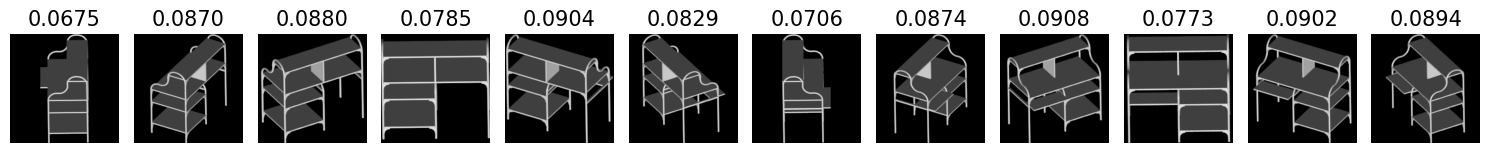

In [ ]:
# for plotting the importance scores of one object from the x_test
#######################
#######################

from sklearn import preprocessing

start_index=  9000
#test_object_label= 0
end_index= start_index + 12 # here 11

object_viewsss=np.zeros(num_views)

# make smaller array conataining only the FVs of the 12 views of one object
# by slicing the test_array to take the n views each times
object_viewsss= all_testing_features[start_index:end_index]
test_object_label= y_test[start_index]

# Calculate importance scores
#############################
k=0 # counter for the view
j= 0 # counter for the other comparied to view
test_importance_Scores=np.zeros(num_views)
# compute the importance scores of the 12 views of one object
for k in range(num_views): # k is the view that I want to calculate its score
    View_Score=0
    for j in range(num_views):
      CS_SCORE= cosineSim(object_viewsss[k],object_viewsss[j]) # CS_SCORE is the Cosine Similarity
      View_Score= View_Score + CS_SCORE
    #View_Score= View_Score - 1 # (no need when using cosine distance)-1 when the view compared to itself since they are completely similar to each other and will give 1
    print("View_Score"+str(View_Score))
    test_importance_Scores[k]=View_Score


print(files_test[start_index])
# Normalize the importance scores
#################################
  #normalized_importance_Scores= preprocessing.normalize([importance_Scores]) #(Scale input vectors individually to unit norm) using sklearn.preprocessing.normalize
test_normalized_importance_Scores= [float(i)/sum(test_importance_Scores) for i in test_importance_Scores] #to normalize against the sum to ensure that the sum is always 1.0 (or as close to as possible).
print("test_normalized_importance_Scores"+str(test_normalized_importance_Scores))
  #if start_index == 0:
Plot_with_Important_Scores(X_test, test_normalized_importance_Scores, y_test, ViewNo_test, start_index, end_index)

  

### Voting Fusion:

for majority voting fusion, the views are selected, then classified. After that, the take the majority voting of the predicted classes of the views belong to same object

#### in all_testing_features 

In [ ]:
# for testing
##########################

# Applay View Selection
#######################
#######################

from sklearn import preprocessing

start_index= 0
test_object_label=0
end_index= num_views # here 11

n= len(all_testing_features)# or n=imgsNumber
object_views=np.zeros(num_views)
#object_views=np.empty(12)

test_NoOfObject= test_NoOfSamples//num_views
#NoOfPixels= WIDTH *HEIGHT*3

y_test_global_descriptor=[]

X_test_global_descriptor3=[]
y_test_global_descriptors3=[]
IS_test_global_descriptor3=[]
viewNo_test_global_descriptor3=[]

X_test_global_descriptor6=[]
y_test_global_descriptors6=[]
IS_test_global_descriptor6=[]
viewNo_test_global_descriptor6=[]

X_test_global_descriptor12=[]
y_test_global_descriptors12=[]
IS_test_global_descriptor12=[]
viewNo_test_global_descriptor12=[]

#X_test_global_descriptor=np.zeros(NoOfObject)
#y_test_global_descriptor=np.zeros(NoOfObject)

finished = "false"
total_objects = n // num_views
with tqdm(total=total_objects, desc="Processing Objects", unit="object") as pbar:
  while finished != "true":
    # make smaller array conataining only the FVs of the 12 views of one object
    # by slicing the all_testing_features to take the n views each times
      object_views= all_testing_features[start_index:end_index]
      test_object_label= y_test[start_index]

    # Calculate importance scores
    #############################
      #test_importance_Scores = np.zeros(num_views)

      # Calculate cosine similarity matrix
      #cosine_similarity_matrix = np.zeros((num_views, num_views))
      #for k in range(num_views):
          #for j in range(k, num_views):
              #cosine_similarity = cosineSim(object_views[k], object_views[j])
              #cosine_similarity_matrix[k, j] = cosine_similarity
              #cosine_similarity_matrix[j, k] = cosine_similarity

      # Compute the importance scores
      #test_importance_Scores = np.sum(cosine_similarity_matrix, axis=1)

    # Calculate importance scores
            #############################
      k=0 # counter for the view
      j= 0 # counter for the other comparied to view
      test_importance_Scores=np.zeros(num_views)
            
      # compute the importance scores of the 12 views of one object
      for k in range(num_views): # k is the view that I want to calculate its score
         View_Score=0
         for j in range(num_views):
                    CS_SCORE= cosineSim(object_views[k],object_views[j]) # CS_SCORE is the Cosine Similarity
                    View_Score= View_Score + CS_SCORE
                    #View_Score= View_Score - 1 # (no need when using cosine distance)-1 when the view compared to itself since they are completely similar to each other and will give 1
                    print("View_Score"+str(View_Score))
         test_importance_Scores[k]=View_Score                  

    # Normalize the importance scores
    #################################
      test_normalized_importance_Scores= [float(i)/sum(test_importance_Scores) for i in test_importance_Scores] #to normalize against the sum to ensure that the sum is always 1.0 (or as close to as possible).
      arr = np.array(test_normalized_importance_Scores) #convert test_normalized_importance_Scores from list to array
      sorted_indices = np.argsort(arr)[::-1]  # Sort the indices in descending order based on importance scores
      
      y_test_global_descriptor.append(test_object_label) # for each object only


    # Fusion: Compute the global descriptor of an object (the most similar 3, 6, 12 views which has the maximum important score\Cosine Similarity )
    ###############################################################################
      Top_n = 3 ## number of views to be selected
      selected_indices = sorted_indices[:Top_n]  # Select the top n indices with the highest scores

      # Get the maximum importance scores and concatenate them into a single array
      selected_scores = np.array(test_normalized_importance_Scores)[selected_indices]
      #IS_test_global_descriptor3.extend(selected_scores)

      # max-pool the selected views as the global descriptor
      selected_views = [object_views[idx] for idx in selected_indices]
      max_pooled_descriptor = np.max(selected_views, axis=0)
      X_test_global_descriptor3.append(max_pooled_descriptor)

      # Save the maximum important scores, max_pooled descriptor, label, and view number
      #y_test_global_descriptors3.extend([test_object_label] * n) # for each selected views
      #viewNo_test_global_descriptor3.append(selected_indices + 1)
     ###############################################################################Top_n = 3 ## number of views to be selected
      Top_n = 6 ## number of views to be selected
      selected_indices = sorted_indices[:Top_n]  # Select the top n indices with the highest scores

      # Get the maximum importance scores and concatenate them into a single array
      selected_scores = np.array(test_normalized_importance_Scores)[selected_indices]
      IS_test_global_descriptor6.extend(selected_scores)

      # max-pool the selected views as the global descriptor
      selected_views = [object_views[idx] for idx in selected_indices]
      # Extend X_test_global_descriptor3 with the selected views
      X_test_global_descriptor6.extend(selected_views)

      # Extend y_test_global_descriptors3 with test_object_label at the corresponding indices
      y_test_global_descriptors6.extend([test_object_label] * Top_n)
      viewNo_test_global_descriptor6.append(selected_indices + 1)
      ###############################################################################
      Top_n = 6 ## number of views to be selected
      selected_indices = sorted_indices[:Top_n]  # Select the top n indices with the highest scores

      # Get the maximum importance scores and concatenate them into a single array
      selected_scores = np.array(test_normalized_importance_Scores)[selected_indices]
      #IS_test_global_descriptor6.extend(selected_scores)

      # max-pool the selected views as the global descriptor
      selected_views = [object_views[idx] for idx in selected_indices]
      max_pooled_descriptor = np.max(selected_views, axis=0)
      X_test_global_descriptor6.append(max_pooled_descriptor)

      # Save the maximum important scores, max_pooled descriptor, label, and view number
      #y_test_global_descriptors6.extend([test_object_label] * n) # for each selected views
      #viewNo_test_global_descriptor6.append(selected_indices + 1)
      ###############################################################################
      

    # Increase indexes to go to the next object
      start_index+= num_views
      end_index+= num_views
      pbar.update(1)  # Update the progress bar

      if (end_index > n): # go only through all images and break if it exceed the array index
        finished = "true"


X_test_global_descriptor12= all_testing_features
y_test_global_descriptor= y_test

# Testing the pre-trained Classifiers:

In [18]:
# ensure that both are ndarray
##########################

# convert the training data from (list) to (nparray)
y_test_global_descriptors3 = np.array(y_test_global_descriptors3)
y_test_global_descriptors6 = np.array(y_test_global_descriptors6)
y_test_global_descriptors12 = np.array(y_test_global_descriptors12)


X_test_global_descriptor3= np.array(X_test_global_descriptor3)
X_test_global_descriptor6= np.array(X_test_global_descriptor6)
X_test_global_descriptor12= np.array(X_test_global_descriptor12)


# ensure that both are ndarray
print(type(y_test_global_descriptors3))
print(type(y_test_global_descriptors6))
print(type(y_test_global_descriptors12))

print(type(X_test_global_descriptor3))
print(type(X_test_global_descriptor6))
print(type(X_test_global_descriptor12))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# for training and testing
##########################

# to print the full NumPy array, without truncation

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
# for training
##########################
# extract the nunmber of tested objects (samples) and thier number of features (features)

samples= y_test_global_descriptors3.shape[0] # samples are the number of objects and its fixed to 38196

print(X_test_global_descriptor3.shape) 
features3= X_test_global_descriptor3.shape[1] # 7404

print(X_test_global_descriptor6.shape) 
features6= X_test_global_descriptor6.shape[1] # 14808

print(X_test_global_descriptor12.shape)
features12= X_test_global_descriptor12.shape[1] # 38196

In [20]:
# Save all features and labels to a single NumPy array file
output_file = "./data/all_testing_labels_global_descriptors3.npy"
np.save(output_file, y_test_global_descriptors3)
output_file = "./data/all_testing_labels_global_descriptors6.npy"
np.save(output_file, y_test_global_descriptors6)
output_file = "./data/all_testing_labels_global_descriptors12.npy"
np.save(output_file, y_test_global_descriptors12)

output_file = "./data/all_testing_global_descriptor3.npy"
np.save(output_file, X_test_global_descriptor3)
output_file = "./data/all_testing_global_descriptor6.npy"
np.save(output_file, X_test_global_descriptor6)
output_file = "./data/all_testing_global_descriptor12.npy"
np.save(output_file, X_test_global_descriptor12)

In [17]:
# Load all features and labels to a single NumPy array file
output_file = "./data/all_testing_labels_global_descriptors3.npy"
y_test_global_descriptors3= np.load(output_file)
output_file = "./data/all_testing_labels_global_descriptors6.npy"
y_test_global_descriptors6= np.load(output_file)
output_file = "./data/all_testing_labels_global_descriptors12.npy"
y_test_global_descriptors12= np.load(output_file)

output_file = "./data/all_testing_global_descriptor3.npy"
X_test_global_descriptor3= np.load(output_file)
output_file = "./data/all_testing_global_descriptor6.npy"
X_test_global_descriptor6= np.load(output_file)
output_file = "./data/all_testing_global_descriptor12.npy"
X_test_global_descriptor12= np.load(output_file)

# Prediction and Results calculation:

In [20]:
# for testing
##########################
# Note: spicify the classes if using the modelnet10
##########################

#  plot_confusion_matrix
#taking from pytorch code

from sklearn.metrics import confusion_matrix
from operator import truediv
import matplotlib.pylab as plt
#import numpy as np


def plot_confusion_matrix_manual(cm, cmap=plt.cm.Blues):
    classes = ['airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car', 'chair',
                   'cone', 'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot', 'glass_box',
                   'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'monitor', 'night_stand',
                   'person', 'piano', 'plant', 'radio', 'range_hood', 'sink', 'sofa', 'stairs',
                   'stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase', 'wardrobe', 'xbox']
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi'] = 300
    # plt.figure(figsize=(20, 20))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    plt.tick_params(labelsize=5)
    # We want to show all ticks...
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes,
        yticklabels=classes)
    plt.title('Confusion matrix', fontsize=6)
    plt.xlabel('Predicted label', fontsize=6)
    plt.ylabel('True label', fontsize=6)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(),
             rotation=45,
             ha="right",
             rotation_mode="anchor")

### FCN:

In [ ]:
########################## Load FCN: 30epochs ##############################

## load the trained model of stage 2

i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    # Load the fully-connected network (FCN)
    MODEL_FILE = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+str(model_name_txt)+"_stage2_FCN.model"
    model_FCN = load_model(MODEL_FILE)
    model_FCN.summary()
    i+=1

### FCL:

In [ ]:
########################## Load FCL: 30epochs ##############################


## load the trained model of stage 2

i=0
for deep_model in all_deep_models:
    model_name = deep_model
    model_name_txt = str(all_model_name_txt[i])
    # Load the fully-connected Layer (FCL)
    MODEL_FILE = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"30epochs"+"/"+str(model_name_txt)+"_stage2_FCL.model"
    model_FCL = load_model(MODEL_FILE)
    model_FCL.summary()
    i+=1

## 3 views

### FCN: 3 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor3.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor3[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCN.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor3[start_index:end_index]

    remaining_predictions = model_FCN.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
# for testing
##########################

#import seaborn as sn
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from scipy.stats import mode

# Do the prediction

(samples, classes)= predictions.shape
#print (predictions)

# Extract the index of prediction from the preds_scores_matrix
y_pred= np.zeros_like(y_test_global_descriptors3)
y_pred_classes= np.empty(len(y_test_global_descriptors3), dtype=object)

for i in range(samples):
   preds_scores_matrix = predictions[i, :]
   idx, label, propability = getPrediction(preds_scores_matrix)
   y_pred[i]= idx
   y_pred_classes[i] = label



# return the predicted classe of the test images as labels such as "airplane
y_true_classes = np.empty(len(y_test_global_descriptors3), dtype=object)
#y_pred_classes = np.empty(len(y_test_global_descriptor), dtype=object)

for t in range (len(y_test_global_descriptors3)):
   y_true_classes[t] = class_info[y_test_global_descriptors3[t]]
   #y_pred_classes[t] = class_info[y_pred[t]]



# Assuming y_true_classes and y_pred_classes are numpy arrays with shape (N,)
# N is the number of sequences

# Reshape the arrays to have shape (N, 3)
y_true_reshaped = y_true_classes.reshape(-1, 3)
y_pred_reshaped = y_pred_classes.reshape(-1, 3)

# Apply majority voting on y_true_reshaped
y_true_majority = mode(y_true_reshaped, axis=1)[0].flatten()

# Apply majority voting on y_pred_reshaped
y_pred_majority = mode(y_pred_reshaped, axis=1)[0].flatten()


#Confution Matrix and Classification Report

#y_true_classes = class_info[y_test] # return the true classe of the test images as labels such as "airplane"
#y_pred_classes = class_info[y_pred] # return the true classe of the predected images as labels such as "airplane"
print('Confusion Matrix')
print(confusion_matrix(y_true_majority, y_pred_majority))
#tn, fp, fn, tp = confusion_matrix(y_true_classes, y_pred_classes).ravel()



print('Classification Report')
#####  I may remove the class number from the target_names
target_names = ['airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car', 'chair', 'cone',
                'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot', 'glass_box', 'guitar', 'keyboard', 'lamp',
                'laptop', 'mantel', 'monitor', 'night_stand', 'person', 'piano', 'plant', 'radio', 'range_hood', 'sink',
                'sofa', 'stairs','stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase', 'wardrobe', 'xbox']

print(classification_report(y_true_majority, y_pred_majority, target_names=target_names))
print ("--- y_true_classes")
print (y_true_classes)
print ("--- y_pred_classes")
print (y_pred_classes)
ccm = confusion_matrix(y_true_majority, y_pred_majority) # Create ConfusionMatrix From Data

results = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_Results_30epochs_FCL_12views.txt"
f = open(results, "w")
cm = ConfusionMatrix(actual_vector=y_true_majority, predict_vector=y_pred_majority) # Create ConfusionMatrix From categorical Data

disp = ConfusionMatrixDisplay(confusion_matrix=ccm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.tight_layout()
plt.savefig("C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"ConfusionMatrix_30epochs_FCL_12views.png", pad_inches=5)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

f.write("{}\n".format(cm))
f.close()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes   
predicted_labels = y_pred_classes  

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")

### FCL: 3 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor3.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor3[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCL.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor3[start_index:end_index]

    remaining_predictions = model_FCL.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
# for testing
##########################

#import seaborn as sn
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from scipy.stats import mode

# Do the prediction

(samples, classes)= predictions.shape
#print (predictions)

# Extract the index of prediction from the preds_scores_matrix
y_pred= np.zeros_like(y_test_global_descriptors3)
y_pred_classes= np.empty(len(y_test_global_descriptors3), dtype=object)

for i in range(samples):
   preds_scores_matrix = predictions[i, :]
   idx, label, propability = getPrediction(preds_scores_matrix)
   y_pred[i]= idx
   y_pred_classes[i] = label



# return the predicted classe of the test images as labels such as "airplane
y_true_classes = np.empty(len(y_test_global_descriptors3), dtype=object)
#y_pred_classes = np.empty(len(y_test_global_descriptor), dtype=object)

for t in range (len(y_test_global_descriptors3)):
   y_true_classes[t] = class_info[y_test_global_descriptors3[t]]
   #y_pred_classes[t] = class_info[y_pred[t]]



# Assuming y_true_classes and y_pred_classes are numpy arrays with shape (N,)
# N is the number of sequences

# Reshape the arrays to have shape (N, 3)
y_true_reshaped = y_true_classes.reshape(-1, 3)
y_pred_reshaped = y_pred_classes.reshape(-1, 3)

# Apply majority voting on y_true_reshaped
y_true_majority = mode(y_true_reshaped, axis=1)[0].flatten()

# Apply majority voting on y_pred_reshaped
y_pred_majority = mode(y_pred_reshaped, axis=1)[0].flatten()


#Confution Matrix and Classification Report

#y_true_classes = class_info[y_test] # return the true classe of the test images as labels such as "airplane"
#y_pred_classes = class_info[y_pred] # return the true classe of the predected images as labels such as "airplane"
print('Confusion Matrix')
print(confusion_matrix(y_true_majority, y_pred_majority))
#tn, fp, fn, tp = confusion_matrix(y_true_classes, y_pred_classes).ravel()



print('Classification Report')
#####  I may remove the class number from the target_names
target_names = ['airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car', 'chair', 'cone',
                'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot', 'glass_box', 'guitar', 'keyboard', 'lamp',
                'laptop', 'mantel', 'monitor', 'night_stand', 'person', 'piano', 'plant', 'radio', 'range_hood', 'sink',
                'sofa', 'stairs','stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase', 'wardrobe', 'xbox']

print(classification_report(y_true_majority, y_pred_majority, target_names=target_names))
print ("--- y_true_classes")
print (y_true_classes)
print ("--- y_pred_classes")
print (y_pred_classes)
ccm = confusion_matrix(y_true_majority, y_pred_majority) # Create ConfusionMatrix From Data

results = "C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+str(model_name_txt)+"_Results_30epochs_FCL_12views.txt"
f = open(results, "w")
cm = ConfusionMatrix(actual_vector=y_true_majority, predict_vector=y_pred_majority) # Create ConfusionMatrix From categorical Data

disp = ConfusionMatrixDisplay(confusion_matrix=ccm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.tight_layout()
plt.savefig("C:/Users/mona/Desktop/Results/"+str(dataset_version)+"/"+str(model_name_txt)+"/"+"ConfusionMatrix_30epochs_FCL_12views.png", pad_inches=5)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

f.write("{}\n".format(cm))
f.close()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes   
predicted_labels = y_pred_classes  

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")

## 6 views

### FCN: 6 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor6.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor6[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCN.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor6[start_index:end_index]

    remaining_predictions = model_FCN.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes  
predicted_labels = y_pred_classes  

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")

### FCL: 6 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor6.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor6[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCL.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor6[start_index:end_index]

    remaining_predictions = model_FCL.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes   
predicted_labels = y_pred_classes  

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")

## 12 views

### FCN: 12 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor12.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor12[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCN.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor12[start_index:end_index]

    remaining_predictions = model_FCN.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes   
predicted_labels = y_pred_classes  

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")

### FCL: 12 views

In [ ]:
batch_size = 32  # Define the batch size

num_samples = X_test_global_descriptor12.shape[0]  # Get the total number of samples in the dataset
num_batches = num_samples // batch_size  # Calculate the number of batches

predictions = []  # List to store the predictions

# Iterate over batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = (i + 1) * batch_size

    # Extract the current batch from the input data
    current_batch = X_test_global_descriptor12[start_index:end_index]

    # Make predictions for the current batch
    batch_predictions = model_FCL.predict(current_batch)

    # Append the batch predictions to the overall predictions list
    predictions.append(batch_predictions)

# Handle the remaining samples if the total number of samples is not evenly divisible by the batch size
if num_samples % batch_size != 0:
    start_index = num_batches * batch_size
    end_index = num_samples

    remaining_samples = X_test_global_descriptor12[start_index:end_index]

    remaining_predictions = model_FCL.predict(remaining_samples)

    predictions.append(remaining_predictions)

# Concatenate the predictions from all batches
predictions = np.concatenate(predictions, axis=0)

In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

from sklearn.metrics import accuracy_score

# Obtain the true labels and predicted labels
true_labels = y_true_classes  
predicted_labels = y_pred_classes 

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate average accuracy
class_labels = set(true_labels)  # Get the unique class labels
num_classes = len(class_labels)
class_accuracies = []

for label in class_labels:
    # Filter the true and predicted labels corresponding to the current class
    true_labels_class = [true_labels[i] for i in range(len(true_labels)) if true_labels[i] == label]
    predicted_labels_class = [predicted_labels[i] for i in range(len(predicted_labels)) if true_labels[i] == label]
    
    # Calculate accuracy for the current class
    class_accuracy = accuracy_score(true_labels_class, predicted_labels_class)
    class_accuracies.append(class_accuracy)

average_accuracy = sum(class_accuracies) / num_classes

# Print overall accuracy and average accuracy
print("Class Accuracy:")
for i in range(40):
    print(target_names[i], "=", class_accuracies[i])
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("Overall Accuracy:", overall_accuracy*100, "%")
print("Average Accuracy:", average_accuracy*100, "%")